In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import keras
import tensorflow as tf

import tensorflow.keras.preprocessing.image 
import tensorflow.keras.models

tf.keras.backend.clear_session()  # Para restablecer fácilmente el estado del portátil.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model, model_selection
import seaborn as sns
#import tensorflow as tf
import keras

from keras.layers import Dense, Dropout
from keras.models         import Sequential
from keras.layers         import Dense, Dropout, Flatten
from keras.utils.np_utils import to_categorical
from keras.callbacks      import EarlyStopping, Callback
from keras.layers         import Conv2D, MaxPooling2D
from keras                import backend as K

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from pickle import dump,load

y=load( open('labels.pkl', 'rb'))
x_train=load( open('x_train.pkl', 'rb'))
x_test=load( open('x_test.pkl', 'rb'))
y_train=load( open('y_train.pkl', 'rb'))
y_test=load( open('y_test.pkl', 'rb'))

yLR_train =load( open('y_trainLR.pkl', 'rb'))
yLR_test =load( open('y_testLR.pkl', 'rb'))

In [6]:
#Ahora calculamos la exactitud del modelo, para ello, se importa la siguiente libreria
from sklearn.metrics import accuracy_score
#Creamos la matriz de confusion
from sklearn.metrics import confusion_matrix,classification_report  
from sklearn.metrics import multilabel_confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg2 = LogisticRegression()

logreg2.fit(x_train,yLR_train)

y_pred=logreg2.predict(x_test)
matriz2=confusion_matrix(yLR_test,y_pred)
display('Matriz de Confusion:')
print(matriz2)

exactitudRL=accuracy_score(yLR_test,y_pred)*100
print('Exactitud del modelo: ',exactitudRL,' %')

'Matriz de Confusion:'

[[12799  6371]
 [   56 25159]]
Exactitud del modelo:  85.51988284330292  %


In [7]:
reporte=classification_report(yLR_test,y_pred)
print(reporte)

              precision    recall  f1-score   support

           0       1.00      0.67      0.80     19170
           1       0.80      1.00      0.89     25215

    accuracy                           0.86     44385
   macro avg       0.90      0.83      0.84     44385
weighted avg       0.88      0.86      0.85     44385



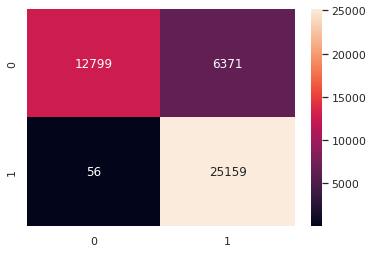

In [8]:
import seaborn as sns
from sklearn.metrics import classification_report


#Creamos la matriz de confusion para la regresion logistica
sns.set_theme(color_codes=True)
sns.heatmap(matriz2, annot=True,fmt='g')

In [9]:
from sklearn.metrics import matthews_corrcoef
print("Coeficiente de Matthews de la regresion logistica")
matthews_corrcoef(yLR_test,y_pred)

Coeficiente de Matthews de la regresion logistica


0.7266903542257519

In [10]:
print("\nclasses_:\nA list of class labels known to the classifier.\n"+str(logreg2.classes_))
print("\ncoef_:\nCoefficient of the features in the decision function.\n"+str(logreg2.coef_))
print("\nintercept_:\nIntercept (a.k.a. bias) added to the decision function.\n"+str(logreg2.intercept_))
print("\nn_features_in_:\nNumber of features seen during fit.\n"+str(logreg2.n_features_in_))
#print("\nfeature_names_in_:"+str(logreg2.feature_names_in_))
print("\nn_iter_:\nActual number of iterations for all classes. If binary or multinomial, it \nreturns only 1 element. For liblinear solver, only the maximum number of \niteration across all classes is given.\n"+str(logreg2.n_iter_))



classes_:
A list of class labels known to the classifier.
[0 1]

coef_:
Coefficient of the features in the decision function.
[[-0.01461367  0.20816426  6.84835613 -1.51470173  0.02278581  6.35692917]]

intercept_:
Intercept (a.k.a. bias) added to the decision function.
[-5.50921256]

n_features_in_:
Number of features seen during fit.
6

n_iter_:
Actual number of iterations for all classes. If binary or multinomial, it 
returns only 1 element. For liblinear solver, only the maximum number of 
iteration across all classes is given.
[31]
